# Multiple Linear Regression Analysis

In [1]:
import numpy as np
import pandas as pd

In [14]:
from sklearn import linear_model

In [8]:
data = pd.read_csv("compiled_features.csv")
data.head()

,Unnamed: 0,LotArea,LotFrontage,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,...,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,YearBuilt
0,0,8450,65.0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,2003
1,1,9600,80.0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,1976
2,2,11250,68.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,2001
3,3,9550,60.0,1,0,0,0,1,0,0,...,0,0,0,1,1,1,0,0,0,1915
4,4,14260,84.0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,2000


In [18]:
data.shape

(1460, 168)

In [10]:
for cols in data.columns:
    print(cols)

Unnamed: 0
LotArea
LotFrontage
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
Condition1_Artery
Condition1_Feedr
Condition1_Norm
Condition1_PosA
Condition1_PosN
Condition1_RRAe
Condition1_RRAn
Condition1_RRNe
Condition1_RRNn
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
Pool
Fence
TotalBsmtSF
LogSalePrice
BsmtHasBath
BsmtQual_Ex
BsmtQual_Fa
BsmtQual_Gd
BsmtQual_TA
BsmtCond

In [12]:
data = data.drop(['Unnamed: 0', 'BsmtScore', 'garagetype_NA', 'garagefinish_NA'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e0b5110>,
      dtype=object)

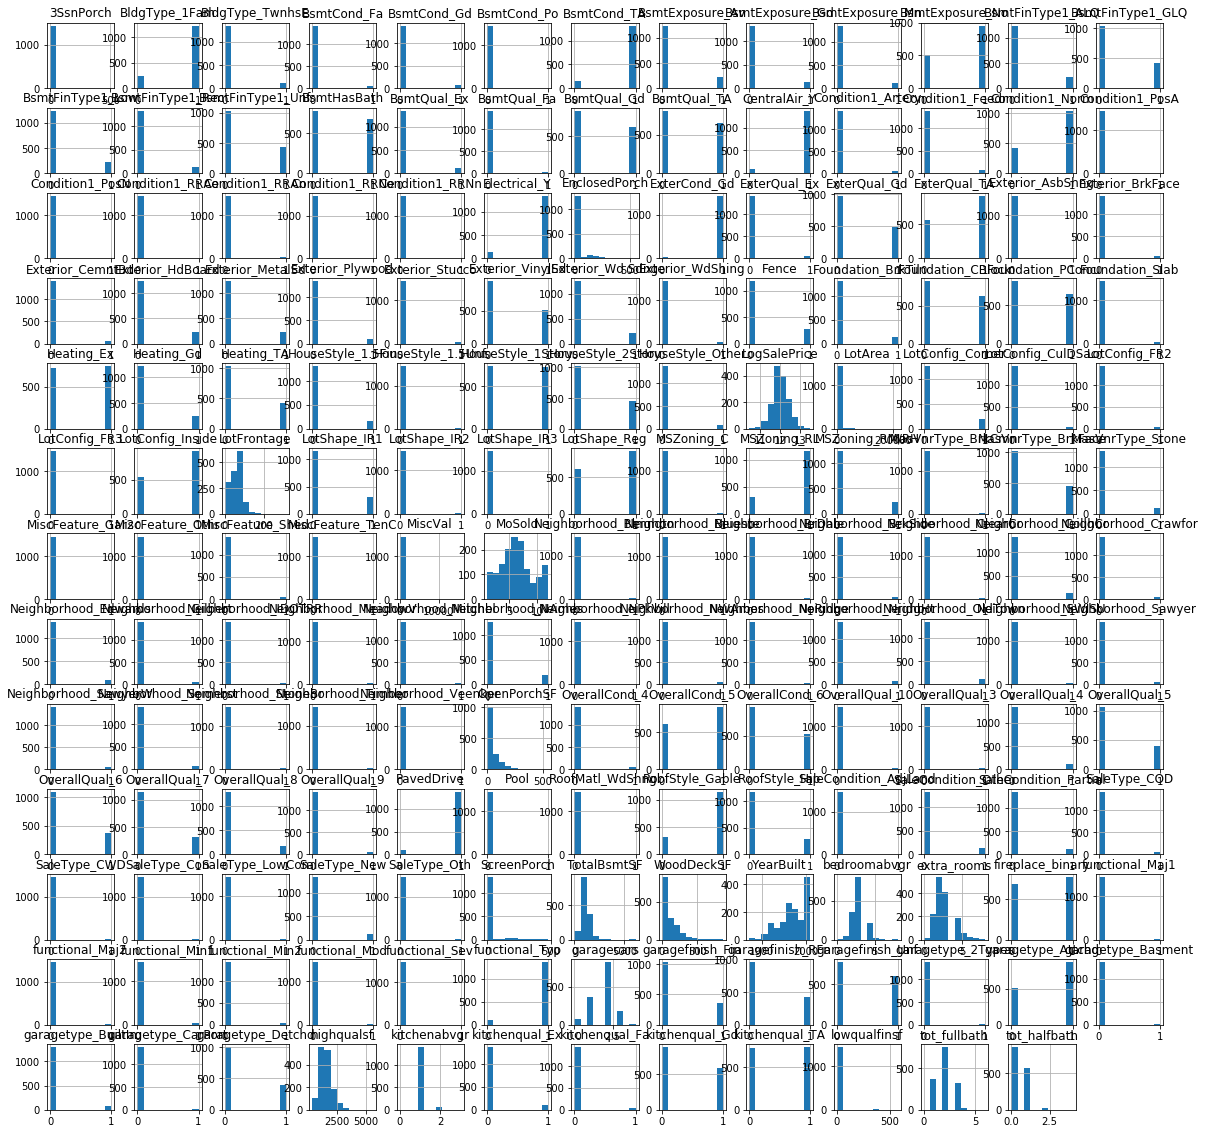

In [17]:
data.hist(figsize = (20, 10))

In [15]:
ols = linear_model.LinearRegression()
np.random.seed(0)

In [32]:
data = data.fillna(0) # fill

In [33]:
data.isnull().sum().sort_values(ascending = False)

YearBuilt             0
Fence                 0
BsmtCond_Fa           0
BsmtQual_TA           0
BsmtQual_Gd           0
                     ..
garagetype_Basment    0
garagetype_Attchd     0
garagetype_2Types     0
garagecars            0
LotArea               0
Length: 168, dtype: int64